In [1]:
import pandas as pd

In [2]:
df_assist = pd.read_csv("attacking.csv", sep = ",")
df_goals = pd.read_csv("goals.csv", sep = ",")
df_passe = pd.read_csv("distributon.csv", sep =",")
df_key = pd.read_csv("key_stats.csv", sep =",")

In [3]:
df_assist.head(2)

,serial,player_name,club,position,assists,corner_taken,offsides,dribbles,match_played
0,1,Bruno Fernandes,Man. United,Midfielder,7,10,2,7,7
1,2,Vinícius Júnior,Real Madrid,Forward,6,3,4,83,13


In [4]:
df_assist[df_assist['player_name']== 'Bale']

,serial,player_name,club,position,assists,corner_taken,offsides,dribbles,match_played


In [5]:
df_goals.head(2)

,serial,player_name,club,position,goals,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties,match_played
0,1,Benzema,Real Madrid,Forward,15,11,1,3,0,13,2,3,12
1,2,Lewandowski,Bayern,Forward,13,8,3,1,1,13,0,3,10


In [6]:
df_passe.head(2)

,serial,player_name,club,position,pass_accuracy,pass_attempted,pass_completed,cross_accuracy,cross_attempted,cross_complted,freekicks_taken,match_played
0,1,Erokhin,Zenit,Midfielder,98.0,27,26,0,2,0,0,6
1,2,Eric García,Barcelona,Defender,97.5,203,197,0,0,0,1,4


In [7]:
df_key.head(2)

,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered
0,Courtois,Real Madrid,Goalkeeper,1230,13,0,0,64.2
1,Vinícius Júnior,Real Madrid,Forward,1199,13,4,6,133.0


In [8]:
df_key[df_key['player_name'] == 'Bale']

,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered
23,Bale,Real Madrid,Forward,7,2,0,0,2.2


In [9]:
df_analise = df_key.copy()


In [10]:
df_analise = df_analise.set_index('player_name')

In [11]:
df_passe = df_passe.set_index('player_name')

    

In [12]:
df_passe[['serial']]

,serial
player_name,
Erokhin,1
Eric García,2
Ulreich,3
Rugani,4
J. Timber,5
...,...
Phillips,604
Philipp,605
Brobbey,606


In [13]:
df_passe_join = pd.DataFrame()
df_passe_join = df_passe[['pass_accuracy', 'pass_attempted', 'pass_completed']]

In [14]:
df_analise = df_analise.join(df_passe_join)


In [15]:
df_analise = df_analise.reset_index()


In [16]:
df_analise

,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered,pass_accuracy,pass_attempted,pass_completed
0,Aaronson,Salzburg,Midfielder,715,8,0,2,103.5,76.1,239.0,181.0
1,Abubakari,Malmö,Forward,116,4,0,0,15.3,82.8,33.0,26.0
2,Acuña,Sevilla,Defender,379,5,0,0,43.2,77.8,275.0,214.0
3,Adams,Leipzig,Midfielder,292,5,0,0,38.9,89.4,166.0,146.0
4,Adamu,Salzburg,Forward,231,8,1,0,32.6,60.4,59.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...
770,Óscar Rodríguez,Sevilla,Midfielder,22,1,0,0,3.8,NaN,NaN,NaN
771,Čolak,Malmö,Forward,500,6,0,0,63,77.5,76.0,59.0
772,Šeško,Salzburg,Forward,234,6,0,0,32.1,67.3,58.0,40.0
773,Šimić,Salzburg,Forward,4,1,0,0,1.3,NaN,NaN,NaN


In [17]:
df_analise[df_analise['player_name'] == 'Bale']

,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered,pass_accuracy,pass_attempted,pass_completed
45,Bale,Real Madrid,Forward,7,2,0,0,2.2,NaN,NaN,NaN


In [18]:
df_analise = df_analise[df_analise['position'].isin(['Forward','Midfielder'])]

In [19]:
df_analise = df_analise.fillna(0)

In [20]:
df_analise = df_analise.reset_index(drop=True)

In [21]:
df_analise[df_analise['club'] == 'Real Madrid']

,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered,pass_accuracy,pass_attempted,pass_completed
19,Asensio,Real Madrid,Forward,207,8,1,2,28.4,72.6,89.0,75.0
23,Bale,Real Madrid,Forward,7,2,0,0,2.2,0.0,0.0,0.0
33,Benzema,Real Madrid,Forward,1106,12,15,1,121.5,83.1,523.0,433.0
40,Blanco,Real Madrid,Midfielder,6,1,0,0,1.3,0.0,0.0,0.0
58,Camavinga,Real Madrid,Midfielder,296,10,0,1,40.2,87.7,179.0,158.0
62,Casemiro,Real Madrid,Midfielder,914,11,0,0,107.6,89.1,538.0,482.0
65,Ceballos,Real Madrid,Midfielder,37,5,0,0,7.8,0.0,0.0,0.0
113,E. Hazard,Real Madrid,Forward,84,3,0,0,10.8,0.0,0.0,0.0
193,Jović,Real Madrid,Forward,113,3,0,0,12.9,90.3,40.0,36.0
217,Kroos,Real Madrid,Midfielder,902,12,2,0,116.5,91.9,814.0,752.0


In [22]:
df_analise.describe()

,minutes_played,match_played,goals,assists,pass_accuracy,pass_attempted,pass_completed
count,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000
mean,308.757112,5.216630,0.746171,0.470460,63.160394,140.483589,119.089716
std,233.216713,2.714303,1.611741,0.970905,33.698387,143.094253,128.237934
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,109.000000,3.000000,0.000000,0.000000,57.800000,30.000000,25.000000
50%,277.000000,5.000000,0.000000,0.000000,79.400000,104.000000,82.000000
75%,468.000000,7.000000,1.000000,1.000000,85.700000,206.000000,176.000000
max,1199.000000,13.000000,15.000000,7.000000,98.000000,814.000000,760.000000


In [23]:
df_analise_midfield = df_analise[(df_analise['assists'] >= 1) & (df_analise['match_played'] >5)&(df_analise['pass_accuracy'] > 80) & (df_analise['position'] == 'Midfielder')& (df_analise['pass_completed']>180)]

In [24]:
df_analise_midfield

,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered,pass_accuracy,pass_attempted,pass_completed
6,Aebischer,Young Boys,Midfielder,504,6,0,1,53.9,85.5,272.0,235.0
29,Bellingham,Dortmund,Midfielder,503,6,1,3,62.3,86.8,281.0,246.0
38,Bernardo Silva,Man. City,Midfielder,878,11,3,3,120.3,91.6,462.0,427.0
60,Capoue,Villarreal,Midfielder,1046,12,2,4,130.9,87.2,491.0,438.0
89,Davies,Bayern,Midfielder,477,7,0,2,61.4,86.7,278.0,236.0
90,De Bruyne,Man. City,Midfielder,734,10,2,4,95.5,82.6,397.0,334.0
128,Fernandinho,Man. City,Midfielder,347,8,0,2,44.7,85.3,291.0,254.0
135,Foden,Man. City,Midfielder,658,11,3,2,89.1,81.1,287.0,238.0
139,Freuler,Atalanta,Midfielder,526,6,1,1,71.6,84.2,360.0,307.0
155,Gravenberch,Ajax,Midfielder,703,8,0,1,89.1,87.4,386.0,342.0


In [25]:
df_analise_forward = df_analise[(df_analise['goals'] >= 3) & (df_analise['match_played'] >=4)&(df_analise['pass_accuracy'] >= 70) & (df_analise['position'] == 'Forward') ]

In [26]:
df_analise_forward

,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered,pass_accuracy,pass_attempted,pass_completed
15,André Silva,Leipzig,Forward,410,6,3,2,47.2,83.8,99.0,82.0
33,Benzema,Real Madrid,Forward,1106,12,15,1,121.5,83.1,523.0,433.0
35,Berghuis,Ajax,Forward,628,8,3,1,79.8,82.0,277.0,229.0
88,David,LOSC,Forward,679,8,3,0,86.1,82.4,148.0,122.0
109,Dybala,Juventus,Forward,255,5,3,1,30.6,87.0,178.0,156.0
112,Džeko,Inter,Forward,541,7,3,1,64.6,72.9,157.0,116.0
150,Gnabry,Bayern,Forward,391,8,3,2,46.7,73.6,231.0,194.0
158,Griezmann,Atlético,Forward,518,9,4,2,64.3,79.8,191.0,151.0
168,Haller,Ajax,Forward,668,8,11,1,82.2,80.8,162.0,134.0
188,Jesus,Man. City,Forward,352,8,4,1,41.9,86.0,131.0,113.0


In [27]:
df_concat = pd.concat([df_analise_midfield, df_analise_forward])

In [28]:
df_concat = df_concat.reset_index(drop = True)

In [29]:
df_concat

,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered,pass_accuracy,pass_attempted,pass_completed
0,Aebischer,Young Boys,Midfielder,504,6,0,1,53.9,85.5,272.0,235.0
1,Bellingham,Dortmund,Midfielder,503,6,1,3,62.3,86.8,281.0,246.0
2,Bernardo Silva,Man. City,Midfielder,878,11,3,3,120.3,91.6,462.0,427.0
3,Capoue,Villarreal,Midfielder,1046,12,2,4,130.9,87.2,491.0,438.0
4,Davies,Bayern,Midfielder,477,7,0,2,61.4,86.7,278.0,236.0
5,De Bruyne,Man. City,Midfielder,734,10,2,4,95.5,82.6,397.0,334.0
6,Fernandinho,Man. City,Midfielder,347,8,0,2,44.7,85.3,291.0,254.0
7,Foden,Man. City,Midfielder,658,11,3,2,89.1,81.1,287.0,238.0
8,Freuler,Atalanta,Midfielder,526,6,1,1,71.6,84.2,360.0,307.0
9,Gravenberch,Ajax,Midfielder,703,8,0,1,89.1,87.4,386.0,342.0


In [30]:
df_gols_por_min = pd.DataFrame()
list = []
for i in range(len(df_concat['minutes_played'])):
    dict = {}
    gols_assist = df_concat['goals'][i] + df_concat['assists'][i]
    nome = df_concat['player_name'][i]
    participacao = df_concat['minutes_played'][i]/gols_assist
    dict.update({'Jogador':nome,'Clube': df_concat['club'][i],'Posicao':df_concat['position'][i],'Gols': df_concat['goals'][i], 'Assistencia': df_concat['assists'][i], 'G+A':gols_assist,'Partidas': df_concat['match_played'][i],'Participacao por minuto': participacao, 'Acuracia do passe': df_concat['pass_accuracy'][i], 'Passes completados': df_concat['pass_completed'][i]})
    list.append(dict)
df_gols_por_min = pd.DataFrame(list)

In [31]:
df_gols_por_min.sort_values('Participacao por minuto', ascending = False)

,Jogador,Clube,Posicao,Gols,Assistencia,G+A,Partidas,Participacao por minuto,Acuracia do passe,Passes completados
25,Valverde,Real Madrid,Midfielder,0,1,1,11,804.000000,85.4,336.0
9,Gravenberch,Ajax,Midfielder,0,1,1,8,703.000000,87.4,342.0
17,Koke,Atlético,Midfielder,0,1,1,9,665.000000,81.1,252.0
0,Aebischer,Young Boys,Midfielder,0,1,1,6,504.000000,85.5,235.0
15,Kanté,Chelsea,Midfielder,0,1,1,6,427.000000,89.8,245.0
18,Lucas Vázquez,Real Madrid,Midfielder,0,1,1,8,349.000000,83.6,207.0
11,Gündoğan,Man. City,Midfielder,0,2,2,10,330.000000,90.8,367.0
20,Modrić,Real Madrid,Midfielder,0,4,4,13,269.250000,89.8,723.0
22,Parejo,Villarreal,Midfielder,1,3,4,12,263.750000,84.3,560.0
8,Freuler,Atalanta,Midfielder,1,1,2,6,263.000000,84.2,307.0


In [32]:
df_gols_por_min

,Jogador,Clube,Posicao,Gols,Assistencia,G+A,Partidas,Participacao por minuto,Acuracia do passe,Passes completados
0,Aebischer,Young Boys,Midfielder,0,1,1,6,504.000000,85.5,235.0
1,Bellingham,Dortmund,Midfielder,1,3,4,6,125.750000,86.8,246.0
2,Bernardo Silva,Man. City,Midfielder,3,3,6,11,146.333333,91.6,427.0
3,Capoue,Villarreal,Midfielder,2,4,6,12,174.333333,87.2,438.0
4,Davies,Bayern,Midfielder,0,2,2,7,238.500000,86.7,236.0
5,De Bruyne,Man. City,Midfielder,2,4,6,10,122.333333,82.6,334.0
6,Fernandinho,Man. City,Midfielder,0,2,2,8,173.500000,85.3,254.0
7,Foden,Man. City,Midfielder,3,2,5,11,131.600000,81.1,238.0
8,Freuler,Atalanta,Midfielder,1,1,2,6,263.000000,84.2,307.0
9,Gravenberch,Ajax,Midfielder,0,1,1,8,703.000000,87.4,342.0


In [33]:
import matplotlib.pyplot as plt

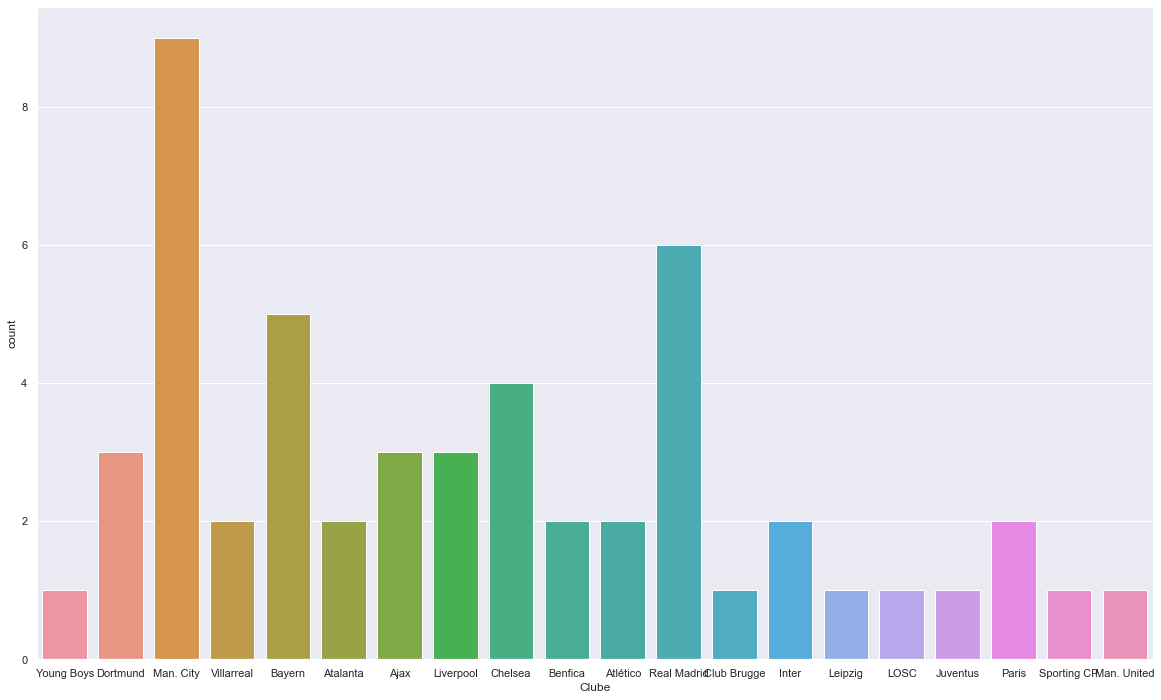

In [34]:
import seaborn as sns
plt.figure(figsize=(20,12))
sns.set(style="darkgrid")
ax = sns.countplot(x="Clube", data=df_gols_por_min)

In [35]:
dat_g_a = df_gols_por_min.sort_values('G+A', ascending= False).head(10)

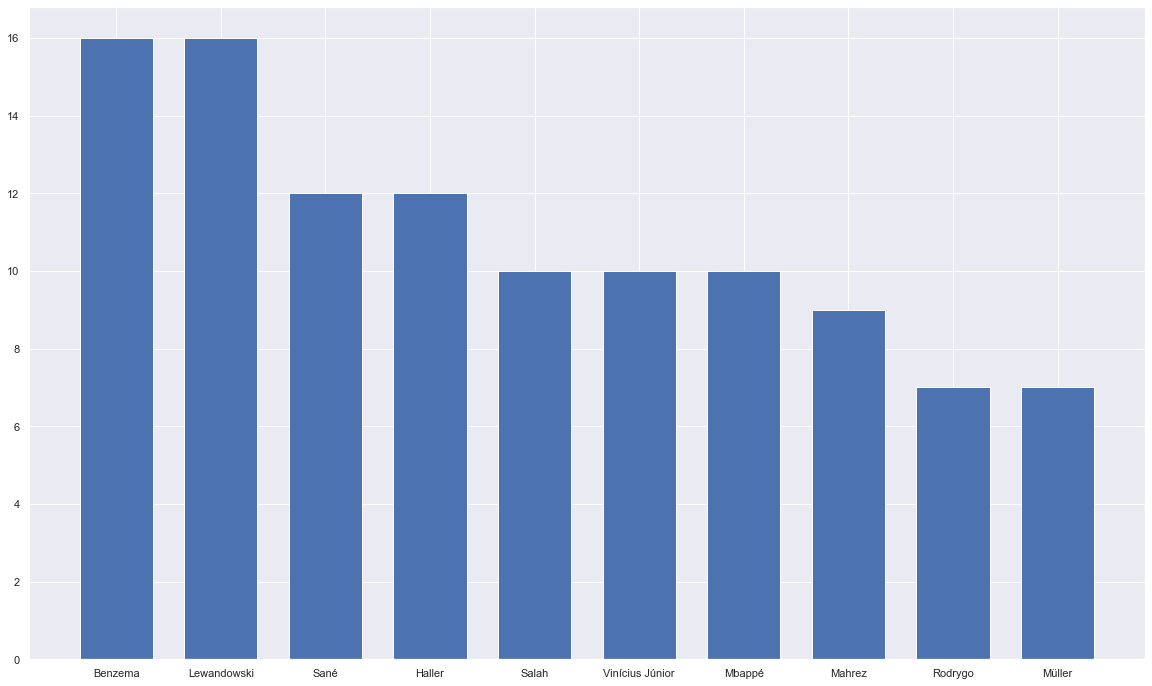

In [36]:
courses = dat_g_a['Jogador']
values = dat_g_a['G+A']
  
fig = plt.figure(figsize = (20, 12))
 
# creating the bar plot
plt.bar(courses, values, color = 'b',
        width = 0.7)
 

plt.show()

In [37]:
df_passes_completos = df_gols_por_min.sort_values('Passes completados', ascending = False).head(10)

<BarContainer object of 10 artists>

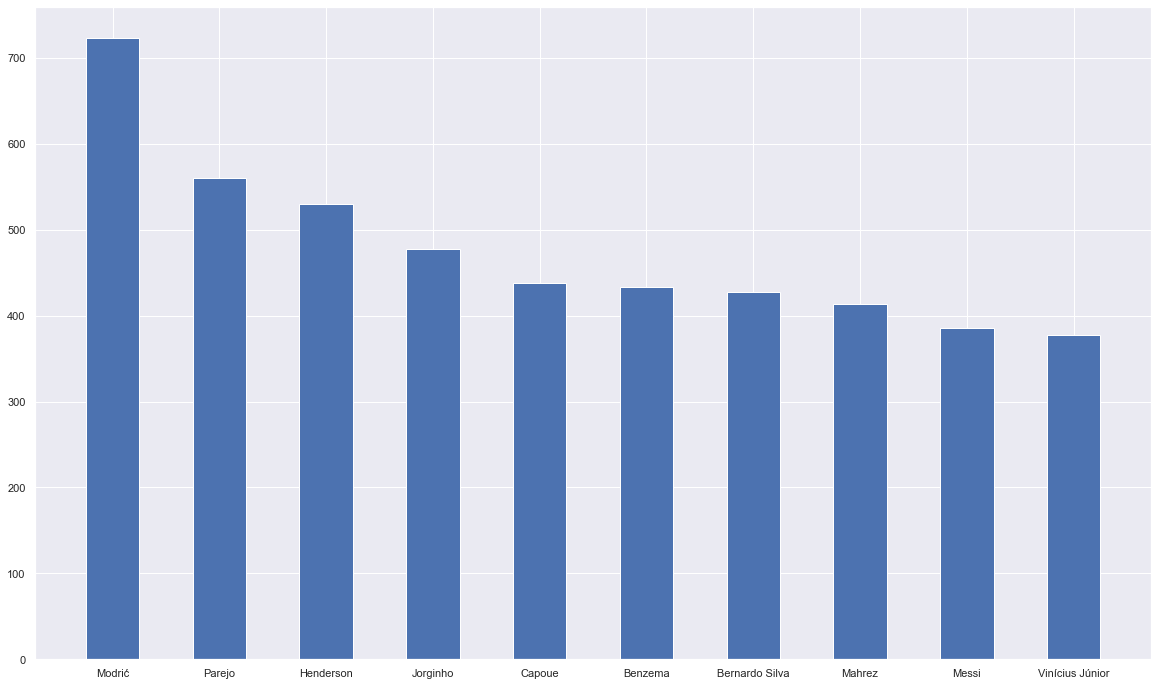

In [38]:
x = df_passes_completos['Jogador']
y = df_passes_completos['Passes completados']

plt.figure(figsize=(20,12))
plt.bar(x,y,color = 'b', width = 0.5)

In [39]:
df_gols_por_min.describe()

,Gols,Assistencia,G+A,Partidas,Participacao por minuto,Acuracia do passe,Passes completados
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,3.096154,1.942308,5.038462,8.692308,188.079159,83.567308,262.250000
std,3.200855,1.363580,3.503284,2.313968,163.847748,5.213923,136.570728
min,0.000000,0.000000,1.000000,5.000000,41.000000,70.000000,58.000000
25%,1.000000,1.000000,3.000000,7.000000,97.183333,81.100000,175.000000
50%,3.000000,2.000000,4.000000,8.000000,133.300000,84.250000,237.000000
75%,4.000000,2.250000,6.000000,10.250000,223.083333,87.050000,343.000000
max,15.000000,6.000000,16.000000,13.000000,804.000000,91.600000,723.000000


In [40]:
list = []
for i in range(len(df_gols_por_min)):
    nota_g_a = 35*(df_gols_por_min['G+A'][i]/df_gols_por_min['G+A'].max())
    nota_participacao = 10*(df_gols_por_min['Participacao por minuto'][i]/df_gols_por_min['Participacao por minuto'].max())
    nota_acuracia = 20 * (df_gols_por_min['Acuracia do passe'][i]/df_gols_por_min['Acuracia do passe'].max())
    nota_passe = 35 * (df_gols_por_min['Passes completados'][i]/df_gols_por_min['Passes completados'].max())
    nota_total = nota_g_a + nota_participacao + nota_acuracia + nota_passe
    dict = {}
    dict.update({"Jogador": df_gols_por_min['Jogador'][i], 'Clube': df_gols_por_min['Clube'][i], 'Nota final': nota_total})
    list.append(dict)
df_analise_final = pd.DataFrame(list)

In [41]:
df_analise_final = df_analise_final.sort_values('Nota final', ascending = False)
df_analise_final = df_analise_final.reset_index(drop=True)
df_analise_final

,Jogador,Clube,Nota final
0,Benzema,Real Madrid,74.965141
1,Modrić,Real Madrid,66.705867
2,Sané,Bayern,62.778734
3,Lewandowski,Bayern,60.842446
4,Vinícius Júnior,Real Madrid,59.760744
5,Mahrez,Man. City,59.628743
6,Salah,Liverpool,57.607643
7,Parejo,Villarreal,57.545853
8,Bernardo Silva,Man. City,55.615882
9,Capoue,Villarreal,55.535946


In [42]:
df_top_10 = df_analise_final.head(10)
df_top_10

,Jogador,Clube,Nota final
0,Benzema,Real Madrid,74.965141
1,Modrić,Real Madrid,66.705867
2,Sané,Bayern,62.778734
3,Lewandowski,Bayern,60.842446
4,Vinícius Júnior,Real Madrid,59.760744
5,Mahrez,Man. City,59.628743
6,Salah,Liverpool,57.607643
7,Parejo,Villarreal,57.545853
8,Bernardo Silva,Man. City,55.615882
9,Capoue,Villarreal,55.535946


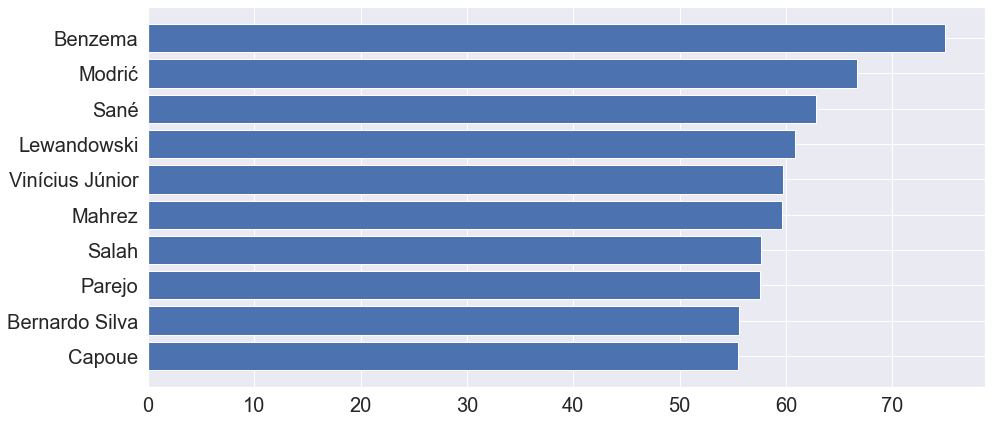

In [43]:
x = df_top_10['Nota final'][::-1]
y = df_top_10['Jogador'][::-1]

plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 

plt.figure(figsize = (15,7))
plt.barh(y,x, color = 'b' )
plt.show()